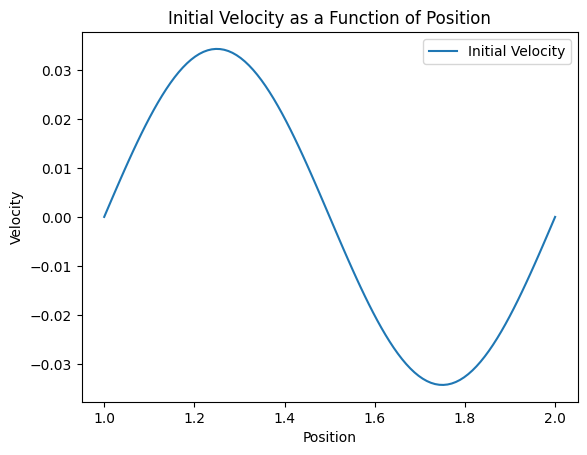

Density: [0.0085726  0.01097236 0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.011029   0.011029   0.011029   0.011029   0.011029
 0.011029   0.01

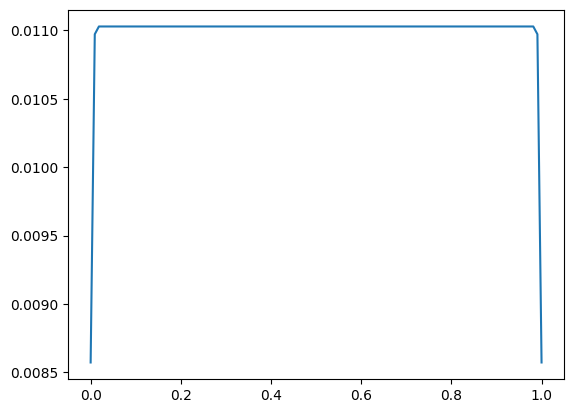

In [2]:

# main.py
import numpy as np
import matplotlib.pyplot as plt
from particle_system import SPHParticles
from density import get_density, cubic_spline_kernel
from boundary_conditions import periodic_bc
from equation_of_state import equation_of_state
from output import output_particles

def main():
    n_particles = 100
    num_ghost_particles = 10
    xmin_value = 1.0
    xmax_value = 2.0
    rho_0_value = 1.0
    output_filename = "particle_properties.txt"

    particles = SPHParticles(n_particles + num_ghost_particles)

    particles.setup(xmin_value, xmax_value, rho_0_value)
    output_particles(particles, output_filename)

    data = np.loadtxt(output_filename, skiprows=1)
    position = data[:, 0]
    velocity = data[:, 1]
    plt.plot(position, velocity, label='Initial Velocity')
    plt.title('Initial Velocity as a Function of Position')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.legend()
    plt.show()

    particles.density = get_density(particles.position, particles.mass, particles.smoothing_length)
    box_size = xmax_value - xmin_value
    periodic_bc(particles.position, box_size, num_ghost_particles)

    particles.pressure = equation_of_state(particles.density, sound_speed=343.0)
    particles.internal_energy = np.zeros_like(particles.position)

    output_particles(particles, output_filename)

    print("Density:", particles.density)
    print("Pressure:", particles.pressure)

    plt.plot(particles.position, particles.density, label='Density')

if __name__ == "__main__":
    main()

NameError: name 'particles' is not defined